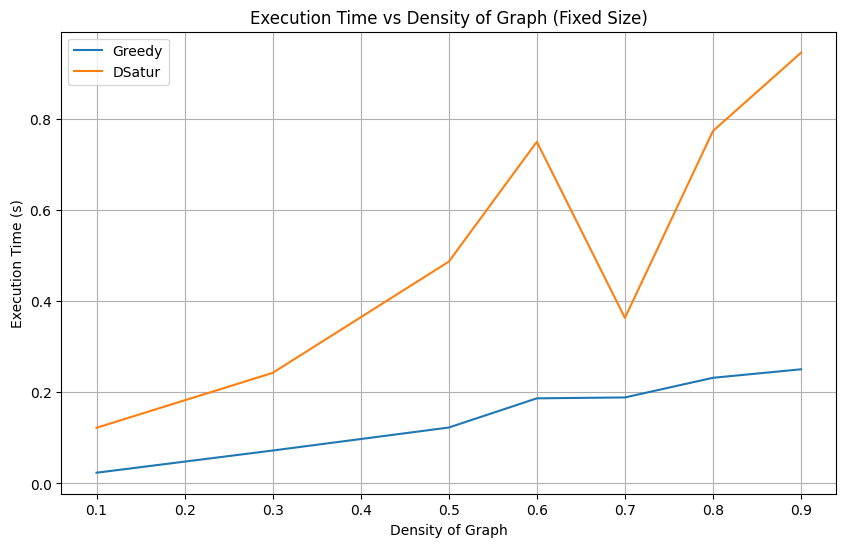

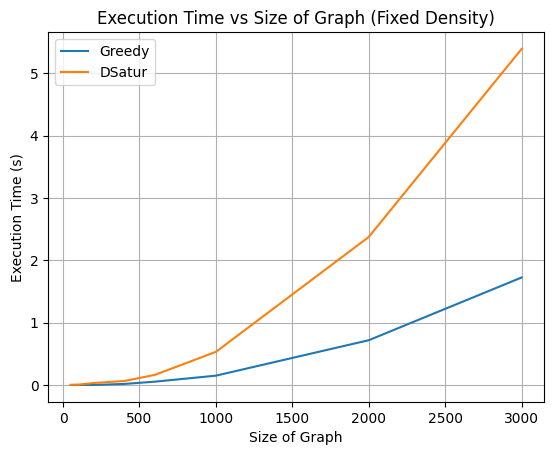

No of colors for greedy: 
[42, 105, 175, 221, 273, 346, 460]
No of colors for DSatur: 
[40, 101, 170, 213, 269, 335, 446]


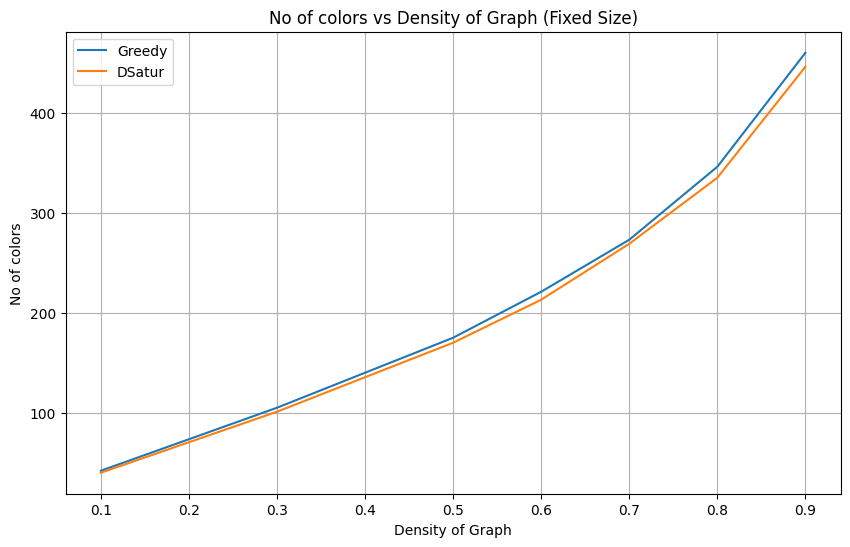

No of colors for greedy: 
[19, 32, 55, 93, 132, 202, 363, 523]
No of colors for DSatur: 
[19, 30, 52, 92, 129, 199, 358, 506]


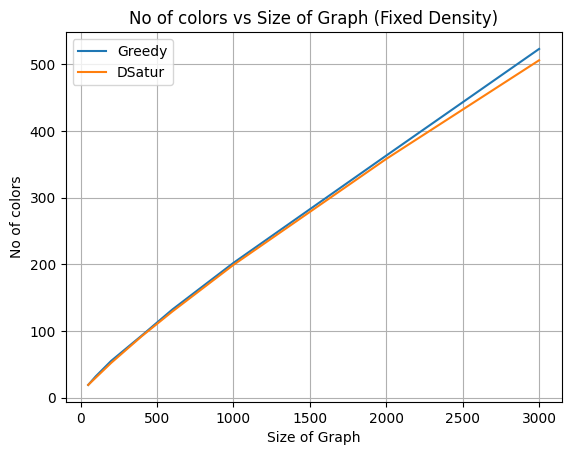

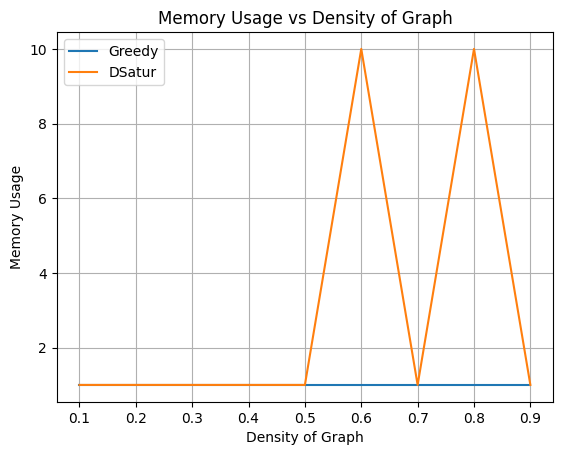

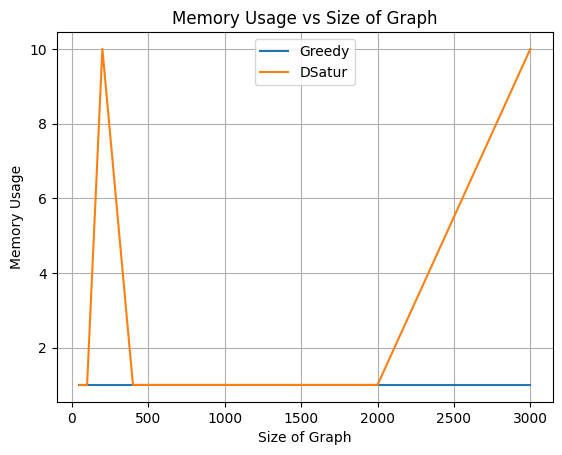

In [17]:
import random
import time
import matplotlib.pyplot as plt
import gc
import heapq
from collections import defaultdict

import random
from collections import defaultdict
import heapq

class Graph:
    def __init__(self, vertices):
        self.V = vertices
        self.graph = defaultdict(list)

    def add_edge(self, u, v):
        self.graph[u].append(v)
        self.graph[v].append(u)

    def degree(self, vertex):
        return len(self.graph[vertex])

def generate_graph(size, density):
    graph = Graph(size)

    max_edges = size * (size - 1) // 2
    num_edges = int(density * max_edges)

    # Generate random edges
    edges_added = 0
    while edges_added < num_edges:
        u, v = random.sample(range(size), 2)
        if v not in graph.graph[u]:  # Check if edge already exists
            graph.add_edge(u, v)
            edges_added += 1

    return graph



def DSatur(graph):
    V = graph.V
    colors = [0] * V
    satur = defaultdict(set)
    Q = []

    for v in range(V):
        degree = graph.degree(v)
        heapq.heappush(Q, (-degree, 0, v))

    while Q:
        _, _, v = heapq.heappop(Q)
        if colors[v] != 0:
            continue
        current_color = 0
        while colors[v] == 0:
            current_color += 1
            if current_color not in satur[v]:
                colors[v] = current_color

        for u in graph.graph[v]:
            if colors[u] == 0 and current_color not in satur[u]:
                satur[u].add(current_color)
                degree = graph.degree(u)
                heapq.heappush(Q, (-len(satur[u]), -degree, u))

    return len(set(colors))




def graph_coloring_greedy(graph):
    colors = {}  # Dictionary to store colors of vertices
    for vertex in range(graph.V):
        used_colors = set()
        for neighbor in graph.graph[vertex]:
            if neighbor in colors:
                used_colors.add(colors[neighbor])
        current_color = 1
        while True:
            if current_color not in used_colors:
                colors[vertex] = current_color
                break
            current_color += 1
    return len(set(colors.values()))


def measure_time(algorithm, graph):
    start_time = time.time()
    result = algorithm(graph)
    end_time = time.time()
    return end_time - start_time

# Function to measure memory usage of an algorithm
def measure_memory(algorithm, graph):
    gc.collect()  # Collect garbage before measuring memory
    memory_before = gc.get_objects()
    result = algorithm(graph)
    gc.collect()  # Collect garbage after algorithm execution
    memory_after = gc.get_objects()
    memory_usage = len(memory_after) - len(memory_before)
    return memory_usage

# Test cases parameters
densities = [0.1, 0.3, 0.5, 0.6, 0.7, 0.8, 0.9]  # Density of edges
sizes = [50, 100, 200, 400, 600, 1000, 2000, 3000]  #No of nodes in graph
colorsGreedy=[]
colorsDSatur=[]

greedy_times = []
greedy_memory = []
dsatur_times = []
dsatur_memory = []

plt.figure(figsize=(10, 6))
for density in densities:
    size = 1000  # Constant size
    graph = generate_graph(size, density)
    greedy_times.append(measure_time(graph_coloring_greedy, graph))
    dsatur_times.append(measure_time(DSatur, graph))
    greedy_memory.append(measure_memory(graph_coloring_greedy, graph))
    dsatur_memory.append(measure_memory(DSatur, graph))

greedy_times2 = []
dsatur_times2 = []
greedy_memory2=[]
dsatur_memory2=[]

for size in sizes:
    density = 0.6  # Constant density
    graph = generate_graph(size, density)
    greedy_times2.append(measure_time(graph_coloring_greedy, graph))
    dsatur_times2.append(measure_time(DSatur, graph))
    greedy_memory2.append(measure_memory(graph_coloring_greedy, graph))
    dsatur_memory2.append(measure_memory(DSatur, graph))

#Densities vs time
plt.plot(densities, greedy_times, label='Greedy')
plt.plot(densities, dsatur_times, label='DSatur')
plt.xlabel('Density of Graph')
plt.ylabel('Execution Time (s)')
plt.title('Execution Time vs Density of Graph (Fixed Size)')
plt.legend()
plt.grid(True)
plt.show()

#Sizes vs time
plt.plot(sizes, greedy_times2, label='Greedy')
plt.plot(sizes, dsatur_times2, label='DSatur')
plt.xlabel('Size of Graph')
plt.ylabel('Execution Time (s)')
plt.title('Execution Time vs Size of Graph (Fixed Density)')
plt.legend()
plt.grid(True)
plt.show()

#Densities vs no of colors used
plt.figure(figsize=(10, 6))
for density in densities:
    size = 1500  # Constant size
    graph = generate_graph(size, density)
    colorsGreedy.append(graph_coloring_greedy(graph))
    colorsDSatur.append(DSatur(graph))

print("No of colors for greedy: ")
print(colorsGreedy)
print("No of colors for DSatur: ")
print(colorsDSatur)

plt.plot(densities, colorsGreedy, label='Greedy')
plt.plot(densities, colorsDSatur, label='DSatur')
plt.xlabel('Density of Graph')
plt.ylabel('No of colors')
plt.title('No of colors vs Density of Graph (Fixed Size)')
plt.legend()
plt.grid(True)
plt.show()


#Sizes vs no of colors used
colorsGreedy=[]
colorsDSatur=[]

for size in sizes:
    density = 0.72  # Constant density
    graph = generate_graph(size, density)
    colorsGreedy.append(graph_coloring_greedy(graph))
    colorsDSatur.append(DSatur(graph))

print("No of colors for greedy: ")
print(colorsGreedy)
print("No of colors for DSatur: ")
print(colorsDSatur)

plt.plot(sizes, colorsGreedy, label='Greedy')
plt.plot(sizes, colorsDSatur, label='DSatur')
plt.xlabel('Size of Graph')
plt.ylabel('No of colors')
plt.title('No of colors vs Size of Graph (Fixed Density)')
plt.legend()
plt.grid(True)
plt.show()

#memory
plt.plot(densities, greedy_memory, label='Greedy')
plt.plot(densities, dsatur_memory, label='DSatur')
plt.xlabel('Density of Graph')
plt.ylabel('Memory Usage')
plt.title('Memory Usage vs Density of Graph')
plt.legend()
plt.grid(True)
plt.show()

#memory
plt.plot(sizes, greedy_memory2, label='Greedy')
plt.plot(sizes, dsatur_memory2, label='DSatur')
plt.xlabel('Size of Graph')
plt.ylabel('Memory Usage')
plt.title('Memory Usage vs Size of Graph')
plt.legend()
plt.grid(True)
plt.show()




In [18]:
def GenerateBipartiteGraph(size):
    # Create adjacency matrix with all zeros
    graph = [[0] * size for _ in range(size)]
    
    # Divide vertices into two disjoint sets
    first_set = list(range(size // 2))
    second_set = list(range(size // 2, size))
    
    # Randomly assign edges between the two sets
    for u in first_set:
        for v in second_set:
            # Probability of connection between vertices can be adjusted as needed
            if random.random() < 0.5:  # Adjust probability as needed
                graph[u][v] = 1
                graph[v][u] = 1
    
    return graph

In [19]:
def GenerateWheelGraph(size):
    if size < 4:
        raise ValueError("Size must be at least 4 for a wheel graph.")
    
    # Create adjacency matrix with all zeros
    graph = [[0] * size for _ in range(size)]
    
    # Connect all vertices of the cycle to the central vertex (hub)
    for i in range(size - 1):
        graph[i][i + 1] = 1
        graph[i + 1][i] = 1
    
    # Connect the last vertex to the first vertex to complete the cycle
    graph[size - 1][0] = 1
    graph[0][size - 1] = 1
    
    # Connect all vertices to the central vertex (hub)
    for i in range(1, size - 1):
        graph[i][size - 1] = 1
        graph[size - 1][i] = 1
    
    return graph

In [20]:
def GenerateCycleGraph(size):
    if size < 3:
        raise ValueError("Size must be at least 3 for a cycle graph.")
    
    # Create adjacency matrix with all zeros
    graph = [[0] * size for _ in range(size)]
    
    # Connect all vertices in a cyclic manner
    for i in range(size - 1):
        graph[i][i + 1] = 1
        graph[i + 1][i] = 1
    
    # Connect the last vertex to the first vertex to complete the cycle
    graph[size - 1][0] = 1
    graph[0][size - 1] = 1
    
    return graph

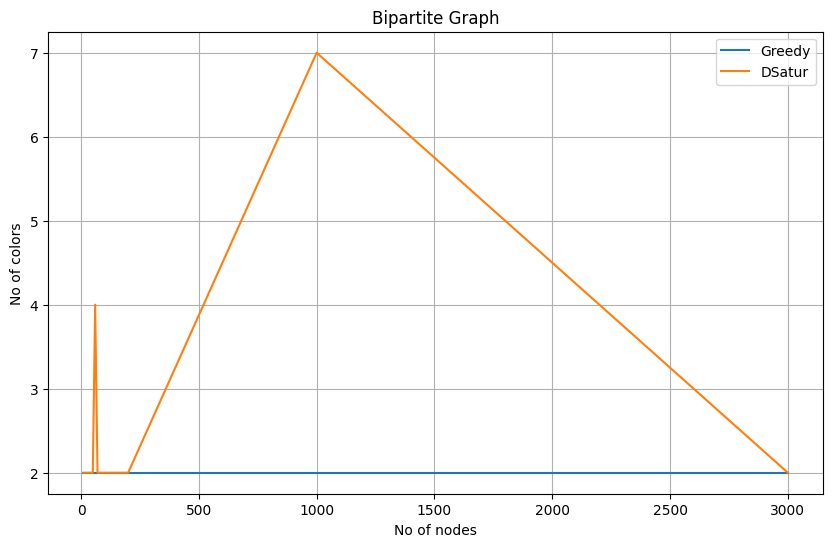

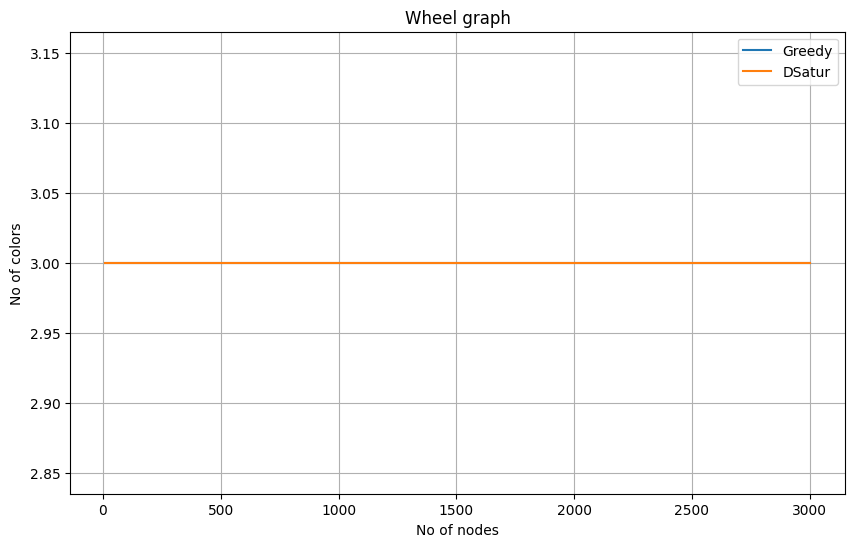

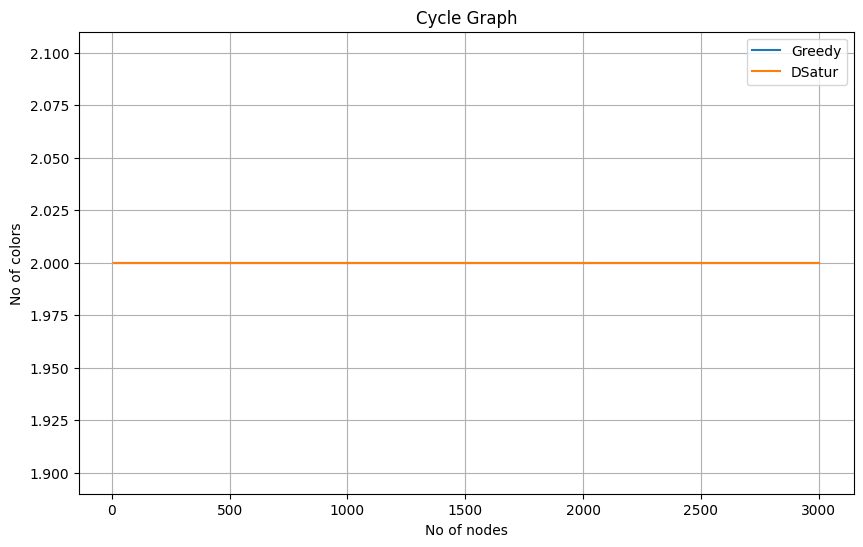

In [21]:
import random
import time
import matplotlib.pyplot as plt
import gc
import heapq
from collections import defaultdict

def graph_coloring_greedy(graph):
    colors = {}  # Dictionary to store colors of vertices
    for vertex in range(len(graph)):
        used_colors = set()
        for neighbor in range(len(graph[vertex])):
            if graph[vertex][neighbor] == 1 and neighbor in colors:
                used_colors.add(colors[neighbor])
        current_color = 1
        while True:
            if current_color not in used_colors:
                colors[vertex] = current_color
                break
            current_color += 1
    return len(set(colors.values()))

def DSatur(graph):
    V = len(graph)
    colors = [0] * V
    satur = defaultdict(set)
    Q = []

    for v in range(V):
        degree = sum(graph[v])
        heapq.heappush(Q, (-degree, 0, v))

    while Q:
        _, _, v = heapq.heappop(Q)
        if colors[v] != 0:
            continue
        current_color = 0
        while colors[v] == 0:
            current_color += 1
            if current_color not in satur[v]:
                colors[v] = current_color

        for u in range(V):
            if graph[v][u] == 1 and colors[u] == 0 and current_color not in satur[u]:
                satur[u].add(current_color)
                degree = sum(graph[u])
                heapq.heappush(Q, (-len(satur[u]), -degree, u))

    return len(set(colors))


BipartiteColorsGreedy=[]
BipartiteColorsDSatur=[]
WheelColorsGreedy=[]
WheelColorsDSatur=[]
CycleColorsGreedy=[]
CycleColorsDSatur=[]

sizes = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 1000, 3000]
for size in sizes:
    BipartiteGraph = GenerateBipartiteGraph(size)
    BipartiteColorsGreedy.append(graph_coloring_greedy(BipartiteGraph))
    BipartiteColorsDSatur.append(DSatur(BipartiteGraph))

    WheelGraph = GenerateWheelGraph(size)
    WheelColorsGreedy.append(graph_coloring_greedy(WheelGraph))
    WheelColorsDSatur.append(DSatur(WheelGraph))
    
    CycleGraph = GenerateCycleGraph(size)
    CycleColorsGreedy.append(graph_coloring_greedy(CycleGraph))
    CycleColorsDSatur.append(DSatur(CycleGraph))



#Bipartite
plt.figure(figsize=(10, 6))
plt.plot(sizes, BipartiteColorsGreedy, label='Greedy')
plt.plot(sizes, BipartiteColorsDSatur, label='DSatur')
plt.xlabel('No of nodes')
plt.ylabel('No of colors')
plt.title('Bipartite Graph')
plt.legend()
plt.grid(True)
plt.show()

#Wheel
plt.figure(figsize=(10, 6))
plt.plot(sizes, WheelColorsGreedy, label='Greedy')
plt.plot(sizes, WheelColorsDSatur, label='DSatur')
plt.xlabel('No of nodes')
plt.ylabel('No of colors')
plt.title('Wheel graph')
plt.legend()
plt.grid(True)
plt.show()

#Cycle
plt.figure(figsize=(10, 6))
plt.plot(sizes, CycleColorsGreedy, label='Greedy')
plt.plot(sizes, CycleColorsDSatur, label='DSatur')
plt.xlabel('No of nodes')
plt.ylabel('No of colors')
plt.title('Cycle Graph')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# No of colors vs Density of Graph (Fixed Size) - Bar Graph
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(densities))
opacity = 0.8

plt.bar(index, colorsGreedy, bar_width, label='Greedy', alpha=opacity, color='b', align='center')
plt.bar(index + bar_width, colorsDSatur, bar_width, label='DSatur', alpha=opacity, color='g', align='center')

plt.xlabel('Density of Graph')
plt.ylabel('No of colors')
plt.title('No of colors vs Density of Graph (Fixed Size)')
plt.xticks(index + bar_width / 2, densities)
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

# No of colors vs Size of Graph (Fixed Density) - Bar Graph
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(sizes))
opacity = 0.8

plt.bar(index, colorsGreedy, bar_width, label='Greedy', alpha=opacity, color='b', align='center')
plt.bar(index + bar_width, colorsDSatur, bar_width, label='DSatur', alpha=opacity, color='g', align='center')

plt.xlabel('Size of Graph')
plt.ylabel('No of colors')
plt.title('No of colors vs Size of Graph (Fixed Density)')
plt.xticks(index + bar_width / 2, sizes)
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()
